# SAGEMAKER TENSORFLOW2 GAN MNIST EXAMPLE

In [ ]:
#see: https://gitlab.com/juliensimon/dlnotebooks/-/tree/master
#see: https://gitlab.com/juliensimon/dlnotebooks/-/tree/master/keras/03-fashion-mnist-sagemaker

In [1]:
!pip install sagemaker --upgrade --user

     |████████████████████████████████| 296 kB 12.6 MB/s eta 0:00:01
  Created wheel for sagemaker: filename=sagemaker-1.69.0-py2.py3-none-any.whl size=384828 sha256=4cafabd3b2ae21d3f0be9fcddb9daf70573980a6aa0eab420a34242365f90b73
  Stored in directory: /home/ec2-user/.cache/pip/wheels/43/11/be/445ade3de346b409945d1275aa2e46dd79fb6dcedff0417d1d
Successfully built sagemaker
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import tensorflow as tf
tf.__version__

'2.0.2'

In [66]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import os
import time

# Get SageMaker Session

In [74]:
import sagemaker

sess = sagemaker.Session()
role = sagemaker.get_execution_role()

# Download MNIST dataset and save it to local folder

In [165]:
os.makedirs("./data", exist_ok = True)
np.savez('./data/training', data=tf.keras.datasets.mnist.load_data())

# Check the downloaded MNIST dataset

In [168]:
#path = tf.keras.utils.get_file('training.npz', './data/training')
data = np.load('./data/training.npz', allow_pickle=True)
train_examples = data["data"][0][0]
train_examples.shape

(60000, 28, 28)

# Upload MNIST data to S3


In [175]:
prefix = 'tf2-gan-mnist'

training_input_path   = sess.upload_data('./data/training.npz', key_prefix=prefix+'/training')
print(training_input_path)

s3://sagemaker-us-east-1-242609326423/tf2-gan-mnist/training/training.npz


# Train TF2-GAN-MODEL outside of SageMaker (just like on your laptop)


In [170]:
%env SM_NUM_GPUS=0
%env SM_MODEL_DIR=/tmp/model
%env SM_CHANNEL_TRAINING=data


!python sagemaker-tf2-gan-mnist.py --epochs 1

env: SM_NUM_GPUS=0
env: SM_MODEL_DIR=/tmp/model
env: SM_CHANNEL_TRAINING=data
Using TensorFlow backend.
tensorflow version: 2.0.2
2020-07-10 18:00:10.814904: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-07-10 18:00:10.820157: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400065000 Hz
2020-07-10 18:00:10.820331: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e63bd1c060 executing computations on platform Host. Devices:
2020-07-10 18:00:10.820350: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
epoch 0 loss 1.6618138551712036
2020-07-10 18:01:59.675473: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [171]:
!ls /tmp/model

001-discriminator  001-generator


# Train with Tensorflow2 on the notebook instance (aka 'local mode')¶

In [176]:
from sagemaker.tensorflow import TensorFlow

tf_estimator = TensorFlow(entry_point='sagemaker-tf2-gan-mnist.py', 
                          role=role,
                          train_instance_count=1, 
                          train_instance_type='local',
                          framework_version='2.0', 
                          py_version='py3',
                          script_mode=True,
                          hyperparameters={'epochs': 1}
                         )

In [178]:
tf_estimator.fit({'training': training_input_path})
print ("jupyter.cell:done!")

'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Creating tmp7551k4be_algo-1-g4n31_1 ... 
Attaching to tmp7551k4be_algo-1-g4n31_12mdone
algo-1-g4n31_1  | 2020-07-10 19:30:58,649 sagemaker-training-toolkit INFO     Imported framework sagemaker_tensorflow_container.training
algo-1-g4n31_1  | 2020-07-10 19:30:58,655 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
algo-1-g4n31_1  | 2020-07-10 19:30:58,915 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
algo-1-g4n31_1  | 2020-07-10 19:30:58,931 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
algo-1-g4n31_1  | 2020-07-10 19:30:58,948 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
algo-1-g4n31_1  | 2020-07-10 19:30:58,958 sagemaker-training-toolkit INFO     Invoking user script
algo-1-g4n31_1  | 
algo-1-g4n31_1  | Training Env:
algo-1-g4n31_1  | 
algo-1-g4n31_1  | {
algo-1-g4n31_1  |     "additional_framework_parameters": {},
algo-1-g4n31_1  |     "cha

algo-1-g4n31_1  | INFO:tensorflow:Assets written to: /opt/ml/model/001-generator/assets
algo-1-g4n31_1  | INFO:tensorflow:Assets written to: /opt/ml/model/001-generator/assets
algo-1-g4n31_1  | INFO:tensorflow:Assets written to: /opt/ml/model/001-discriminator/assets
algo-1-g4n31_1  | INFO:tensorflow:Assets written to: /opt/ml/model/001-discriminator/assets
algo-1-g4n31_1  | 2020-07-10 19:32:11,212 sagemaker_tensorflow_container.training WARNING  Your model will NOT be servable with SageMaker TensorFlow Serving containers. The SavedModel bundle is under directory "001-discriminator", not a numeric name.
algo-1-g4n31_1  | 2020-07-10 19:32:11,212 sagemaker_tensorflow_container.training WARNING  Your model will NOT be servable with SageMaker TensorFlow Serving containers. The SavedModel bundle is under directory "001-generator", not a numeric name.
algo-1-g4n31_1  | 2020-07-10 19:32:11,213 sagemaker-training-toolkit INFO     Reporting training SUCCESS
tmp7551k4be_algo-1-g4n31_1 exited wit

In [253]:
model_data_path=tf_estimator.model_data
model_data_path

's3://sagemaker-us-east-1-242609326423/tensorflow-training-2020-07-10-19-30-52-201/model.tar.gz'

# Do prediction by using model generated.

In [263]:
!aws s3 cp $model_data_path .
!ls

download: s3://sagemaker-us-east-1-242609326423/tensorflow-training-2020-07-10-19-30-52-201/model.tar.gz to ./model.tar.gz
aws-sagemaker-mnist-classification.ipynb  sagemaker-tf2-gan-mnist.ipynb
data					  sagemaker-tf2-gan-mnist.py
Fashion MNIST-SageMaker.ipynb		  test.ipynb
mnist_keras_tf.py			  tf2-gan-mnist
model.tar.gz				  Untitled.ipynb
README.md


In [267]:
!mkdir -p model_output && tar xvf model.tar.gz -C model_output

001-discriminator/
001-discriminator/variables/
001-discriminator/variables/variables.data-00000-of-00001
001-discriminator/variables/variables.index
001-discriminator/assets/
001-discriminator/saved_model.pb
001-generator/
001-generator/variables/
001-generator/variables/variables.data-00000-of-00001
001-generator/variables/variables.index
001-generator/assets/
001-generator/saved_model.pb


In [269]:
!ls model_output/001-generator

assets	saved_model.pb	variables


In [272]:
saved_generator_model = tf.saved_model.load("./model_output/001-generator", tags=None)

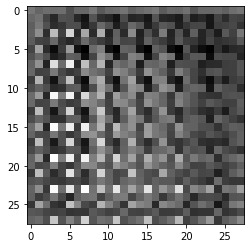

In [277]:
import matplotlib.pyplot as plt

def show_first_image_in_batch(model):
    batch_size, noise_dim =16, 100
    noise = tf.random.normal([batch_size, noise_dim ])
    generated_images = saved_generator_model(noise, training=False)
    plt.imshow(generated_images[0, :, :, 0] * 127.5 + 127.5, cmap='gray')

show_first_image_in_batch(saved_generator_model)

# Train with Tensorflow on a GPU instance


In [281]:
tf_estimator = TensorFlow(entry_point='sagemaker-tf2-gan-mnist.py', 
                          role=role,
                          train_instance_count=1, 
                          train_instance_type='ml.p3.2xlarge',
                          framework_version='2.0', 
                          py_version='py3',
                          script_mode=True,
                          hyperparameters={
                              'epochs': 60,
                              'batch-size': 256,
                              'learning-rate': 0.01}
                         )
tf_estimator.fit({'training': training_input_path})
print("jupyter.cell:done!")

'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-10 20:24:22 Starting - Starting the training job...
2020-07-10 20:24:24 Starting - Launching requested ML instances......
2020-07-10 20:25:42 Starting - Preparing the instances for training............
2020-07-10 20:27:41 Downloading - Downloading input data
2020-07-10 20:27:41 Training - Downloading the training image......
2020-07-10 20:28:48 Training - Training image download completed. Training in progress..2020-07-10 20:28:51,838 sagemaker-training-toolkit INFO     Imported framework sagemaker_tensorflow_container.training
2020-07-10 20:28:52,350 sagemaker-training-toolkit INFO     Invoking user script

Training Env:

{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "training": "/opt/ml/input/data/training"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_tensorflow_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "batch-size": 256,
        "learning-rate": 0.01,
       


2020-07-10 20:31:07 Completed - Training job completed
Training seconds: 213
Billable seconds: 213


download: s3://sagemaker-us-east-1-242609326423/tensorflow-training-2020-07-10-20-16-26-740/output/model.tar.gz to ./model.tar.gz
001-discriminator/
001-discriminator/assets/
001-discriminator/saved_model.pb
001-discriminator/variables/
001-discriminator/variables/variables.data-00000-of-00002
001-discriminator/variables/variables.index
001-discriminator/variables/variables.data-00001-of-00002
001-generator/
001-generator/assets/
001-generator/saved_model.pb
001-generator/variables/
001-generator/variables/variables.data-00000-of-00002
001-generator/variables/variables.index
001-generator/variables/variables.data-00001-of-00002


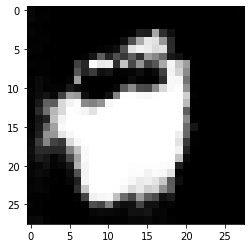

In [280]:
model_data_path=tf_estimator.model_data
!aws s3 cp $model_data_path .
!mkdir -p model_output && tar xvf model.tar.gz -C model_output
saved_generator_model = tf.saved_model.load("./model_output/001-generator", tags=None)
show_first_image_in_batch(saved_generator_model)